# Delhi_Home_Price_Prediction

- Here we Predict home prices of Delhi, based on certain features like Location, Area, BHK, Type etc.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [22]:
df1=pd.read_csv(r'G:\Delhi_House_Price.csv')
df1.head(10)

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
0,950.0,2,2.0,Furnished,Karol Bagh,Central Delhi,"DDA MIG Flats Prasad Nagar Phase 2, Prasad Nag...",1.0,Ready_to_move,Resale,Apartment,8761.0,12500000
1,535.0,2,1.0,Furnished,Karol Bagh,Central Delhi,"Dev Nagar, Karol Bagh",1.0,Ready_to_move,New_Property,Apartment,7290.0,3900000
2,1280.0,3,3.0,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2.0,Ready_to_move,Resale,Builder_Floor,14092.0,15000000
3,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000
4,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000
5,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,14366.0,25000000
6,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,13324.0,24500000
7,900.0,3,2.0,Furnished,Okhla,East Delhi,"Abul Fazal Enclave Part-II, Okhla",1.0,Ready_to_move,Resale,Builder_Floor,16917.0,5500000
8,312.0,4,4.0,Furnished,Laxmi Nagar,East Delhi,"Bank Enclave, Laxmi Nagar",1.0,Ready_to_move,Resale,Apartment,112179.0,35000000
9,1500.0,3,3.0,Furnished,Vasundhara,East Delhi,"Capital Apartment, Vasundhara Enclave",2.0,Ready_to_move,Resale,Apartment,10000.0,15000000


In [23]:
df2=df1.drop(['District','Status','Transaction','Locality'],axis='columns')
df2.head()

,Area,BHK,Bathroom,Furnishing,Location,Parking,Type,Per_Sqft,Price
0,950.0,2,2.0,Furnished,Karol Bagh,1.0,Apartment,8761.0,12500000
1,535.0,2,1.0,Furnished,Karol Bagh,1.0,Apartment,7290.0,3900000
2,1280.0,3,3.0,Furnished,Karol Bagh,2.0,Builder_Floor,14092.0,15000000
3,1135.0,3,3.0,Furnished,Karol Bagh,2.0,Apartment,22222.0,25000000
4,1135.0,3,3.0,Furnished,Karol Bagh,2.0,Apartment,22222.0,25000000


In [24]:
df2.shape

(1214, 9)

In [25]:
#Finding the Total number of Nan values in each column df2.isnull().sum()

In [26]:
per_sqft_mean=df2['Per_Sqft'].mean()
per_sqft_mean

15574.88591983556

In [27]:
#Filling Per_Sqft columns Nan values with mean.
df2['Per_Sqft']=df2['Per_Sqft'].fillna(per_sqft_mean)

In [28]:
df2.isnull().sum()

Area           0
BHK            0
Bathroom       2
Furnishing     0
Location       0
Parking       32
Type           5
Per_Sqft       0
Price          0
dtype: int64

In [29]:
#AS only few rows of Parking and others columns has Nan values, we ignore them
df3=df2.dropna()
df3.isnull().sum()

Area          0
BHK           0
Bathroom      0
Furnishing    0
Location      0
Parking       0
Type          0
Per_Sqft      0
Price         0
dtype: int64

In [30]:
df3.shape

(1181, 9)

In [31]:
df3['Location'].unique()

array(['Karol Bagh', 'Okhla', 'Laxmi Nagar', 'Vasundhara',
       'Dilshad Garden', 'Geeta Colony', 'Budh Vihar', 'Rohini', 'Narela',
       'Shahdara', 'Alaknanda', 'Chhattarpur', 'Chittaranjan Park',
       'Friends Colony', 'Malviya Nagar', 'Hauz Khas', 'Lajpat Nagar',
       'Mahavir Enclave', 'Mehrauli', 'Greater Kailash', 'Sheikh Sarai',
       'Saket', 'Sarita Vihar', 'Kalkaji', 'Safdarjung Enclave',
       'Vasant Kunj', 'Janakpuri', 'Manglapuri', 'Sultanpur', 'Dwarka',
       'Moti Nagar', 'Paschim Vihar', 'Patel Nagar', 'Punjabi Bagh',
       'Uttam Nagar'], dtype=object)

In [32]:
#Removing Outliers
#Let us come up with a constraint that 'Average Area of a BHK is 300sqft'
df3[df3['Area']/df3['BHK']<300].head()

,Area,BHK,Bathroom,Furnishing,Location,Parking,Type,Per_Sqft,Price
1,535.0,2,1.0,Furnished,Karol Bagh,1.0,Apartment,7290.0,3900000
8,312.0,4,4.0,Furnished,Laxmi Nagar,1.0,Apartment,112179.0,35000000
14,500.0,2,1.0,Furnished,Dilshad Garden,1.0,Apartment,12000.0,5800000
15,760.0,3,2.0,Furnished,Geeta Colony,1.0,Builder_Floor,6667.0,6000000
16,810.0,5,6.0,Furnished,Geeta Colony,1.0,Apartment,6667.0,28900000


In [33]:
df4=df3[~(df3['Area']/df3['BHK']<300)]
df4.shape

(1012, 9)

In [34]:
df4.Per_Sqft.describe()

count      1012.000000
mean      15816.696146
std       19671.959447
min        1259.000000
25%        7000.000000
50%       14722.000000
75%       15574.885920
max      183333.000000
Name: Per_Sqft, dtype: float64

In [35]:
#This function remove the outliers by considering values of 1 standard deviation.
def remove_per_sqft_outliers(df):
    ndf=pd.DataFrame()
    for key,subdf in df.groupby('Location'):
        m=np.mean(subdf['Per_Sqft'])
        sd=np.std(subdf['Per_Sqft'])
        reduced_df=subdf[(subdf['Per_Sqft']>=(m-1*sd)) & (subdf['Per_Sqft']<=(m+1*sd))]
        ndf=pd.concat([ndf,reduced_df],ignore_index=True)
    return ndf
df5=remove_per_sqft_outliers(df4)
df5.shape

(765, 9)

In [36]:
df5.Per_Sqft.describe()

count      765.000000
mean     12651.424094
std       6092.743652
min       1259.000000
25%       6714.000000
50%      14366.000000
75%      15574.885920
max      37037.000000
Name: Per_Sqft, dtype: float64

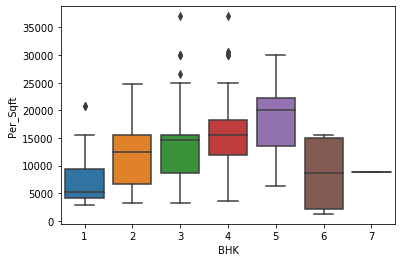

In [37]:
sb.boxplot(x=df5.BHK,y=df5.Per_Sqft)

In [38]:
df5.shape

(765, 9)

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Per_Sqft),
                'std': np.std(bhk_df.Per_Sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Per_Sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape

(619, 9)

Text(0.5, 0, 'price per sqft')

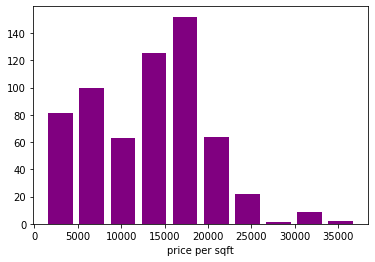

In [61]:
plt.hist(df6.Per_Sqft,rwidth=0.8,color='purple')
plt.xlabel('price per sqft')

In [41]:
df6.Bathroom.unique()

array([3., 2., 1., 4., 5., 6., 7.])

Text(0, 0.5, 'count')

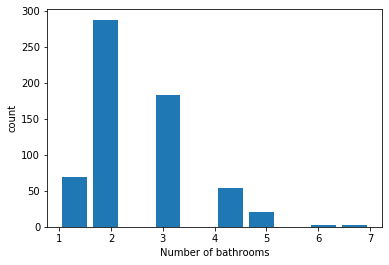

In [62]:
plt.hist(df6.Bathroom,rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('count')

In [44]:
df7=df6.drop(['Per_Sqft'],axis='columns')
df7.head()

,Area,BHK,Bathroom,Furnishing,Location,Parking,Type,Price
0,1400.0,3,3.0,Furnished,Alaknanda,1.0,Apartment,18000000
1,1200.0,2,2.0,Semi-Furnished,Alaknanda,2.0,Apartment,17500000
2,1400.0,2,2.0,Semi-Furnished,Alaknanda,2.0,Apartment,14000000
3,450.0,1,1.0,Semi-Furnished,Alaknanda,1.0,Builder_Floor,3000000
4,1200.0,2,2.0,Semi-Furnished,Alaknanda,2.0,Apartment,17500000


In [45]:
df7['Type'].unique()

array(['Apartment', 'Builder_Floor'], dtype=object)

In [46]:
#creating dummie variables for columns which contain strings
dummies1=pd.get_dummies(df7.Location)
dummies2=pd.get_dummies(df7.Furnishing)
dummies3=pd.get_dummies(df7.Type)

In [47]:
df8=pd.concat([df7,dummies1,dummies2,dummies3],axis='columns')
df8.head()

,Area,BHK,Bathroom,Furnishing,Location,Parking,Type,Price,Alaknanda,Budh Vihar,...,Sheikh Sarai,Sultanpur,Uttam Nagar,Vasant Kunj,Vasundhara,Furnished,Semi-Furnished,Unfurnished,Apartment,Builder_Floor
0,1400.0,3,3.0,Furnished,Alaknanda,1.0,Apartment,18000000,1,0,...,0,0,0,0,0,1,0,0,1,0
1,1200.0,2,2.0,Semi-Furnished,Alaknanda,2.0,Apartment,17500000,1,0,...,0,0,0,0,0,0,1,0,1,0
2,1400.0,2,2.0,Semi-Furnished,Alaknanda,2.0,Apartment,14000000,1,0,...,0,0,0,0,0,0,1,0,1,0
3,450.0,1,1.0,Semi-Furnished,Alaknanda,1.0,Builder_Floor,3000000,1,0,...,0,0,0,0,0,0,1,0,0,1
4,1200.0,2,2.0,Semi-Furnished,Alaknanda,2.0,Apartment,17500000,1,0,...,0,0,0,0,0,0,1,0,1,0


In [48]:
df9=df8.drop(['Location','Type','Furnishing'],axis='columns')

In [49]:
df9.shape

(619, 45)

In [50]:
x=df9.drop('Price',axis='columns')

In [51]:
y=df9.Price

In [52]:
#Using Gridsearchcv to select best machine learning model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest':{
            'model': RandomForestClassifier(),
            'params':{
            'n_estimators': [200,700]
            }
        },
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(x,y)


C:\Users\sakhi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.9562616009902824e+16, tolerance: 28774688509979.805
  positive)
C:\Users\sakhi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.37469871898581e+16, tolerance: 33908649882828.277
  positive)
C:\Users\sakhi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.369789430734125e+16, tolerance: 34080240209494.953
  positive)
C:\Users\sakhi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

,model,best_score,best_params
0,linear_regression,0.556130,{'normalize': False}
1,lasso,0.556313,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.789050,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,random_forest,0.161290,{'n_estimators': 200}


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [54]:
from sklearn import tree
model=tree.DecisionTreeRegressor(criterion='mse',splitter='best')

In [55]:
model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [56]:
model.score(x_test,y_test)

0.6882166017282265

In [57]:
df3.head(3)

,Area,BHK,Bathroom,Furnishing,Location,Parking,Type,Per_Sqft,Price
0,950.0,2,2.0,Furnished,Karol Bagh,1.0,Apartment,8761.0,12500000
1,535.0,2,1.0,Furnished,Karol Bagh,1.0,Apartment,7290.0,3900000
2,1280.0,3,3.0,Furnished,Karol Bagh,2.0,Builder_Floor,14092.0,15000000


In [58]:
def predict_price(Location,Type,Fur,Area,BHK,Bathroom,Parking):    
    loc_index = np.where(x.columns==Location)[0][0]
    Fur_index=np.where(x.columns==Fur)[0][0]
    type_index=np.where(x.columns==Type)[0][0]

    u = np.zeros(len(x.columns))
    u[0] = Area
    u[1] = Bathroom
    u[2] = BHK
    u[3] = Parking
    if loc_index >= 0:
        u[loc_index] = 1
    if Fur_index >= 0:
        u[Fur_index] = 1
    if type_index >= 0:
        u[type_index] = 1
    return model.predict([u])[0]

In [59]:
predict_price('Karol Bagh','Builder_Floor','Furnished',1280,3,3,2)

15000000.0